# Spotify dataset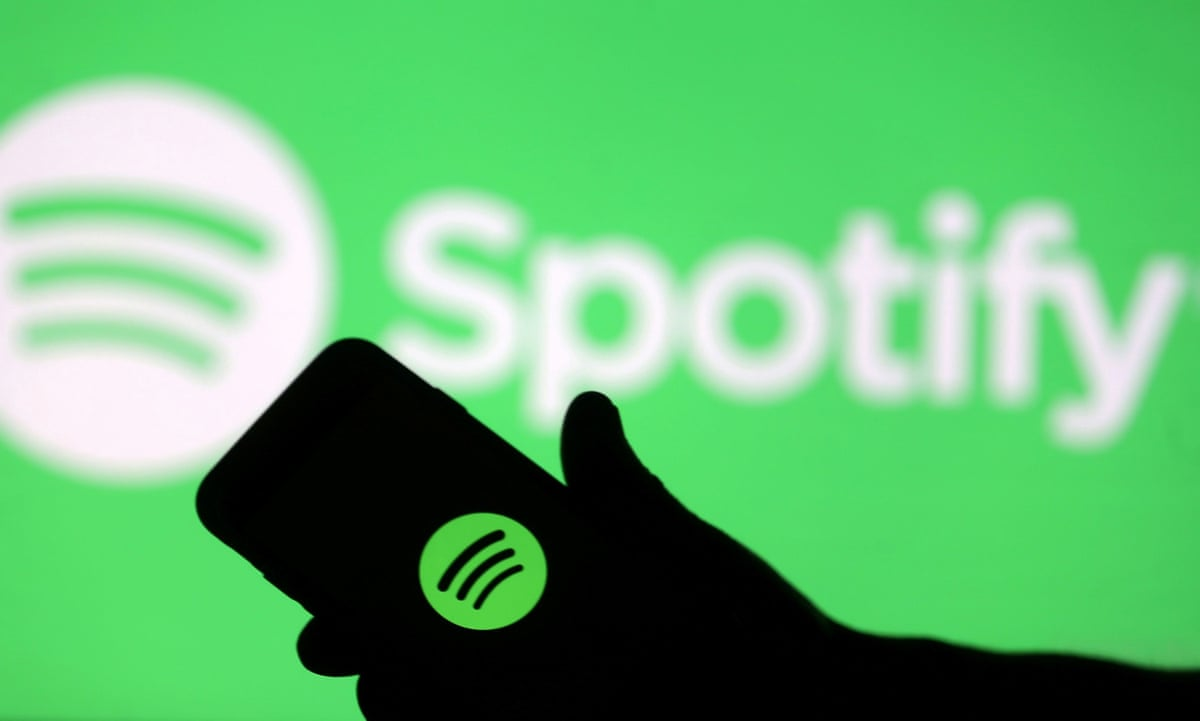

predict popularity of a song (regression) based solely on other features/characterics of the music track

# parameter overview

accousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

from: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Basic analysis

Read the data and loot at first rows and statistics

In [3]:
data = pd.read_csv('./data.csv')
data_genre = pd.read_csv('./data_w_genres.csv')

data.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [181]:
data_by_genre = pd.read_csv('./data_by_genres.csv')
data_by_artist = pd.read_csv('./data_by_artist.csv')
data_by_year = pd.read_csv('./data_by_year.csv')


In [3]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [4]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
data.shape, data_genre.shape
#data.dtypes

((170653, 19), (28680, 16))

There are some categorical features in the data

In [7]:
categorical_col = [col for col in data.columns if data.dtypes[col] == 'object']
non_categorical_col = [col for col in data.columns if data.dtypes[col] == 'float64' or data.dtypes[col] == 'int64' ]
print('Cetegorical columns:{0}'.format(categorical_col))
print('Non categorical columns:{0}'.format(non_categorical_col))

Cetegorical columns:['artists', 'id', 'name', 'release_date']
Non categorical columns:['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


# Visualization

Plot correlation matrix to find correlations

<AxesSubplot:>

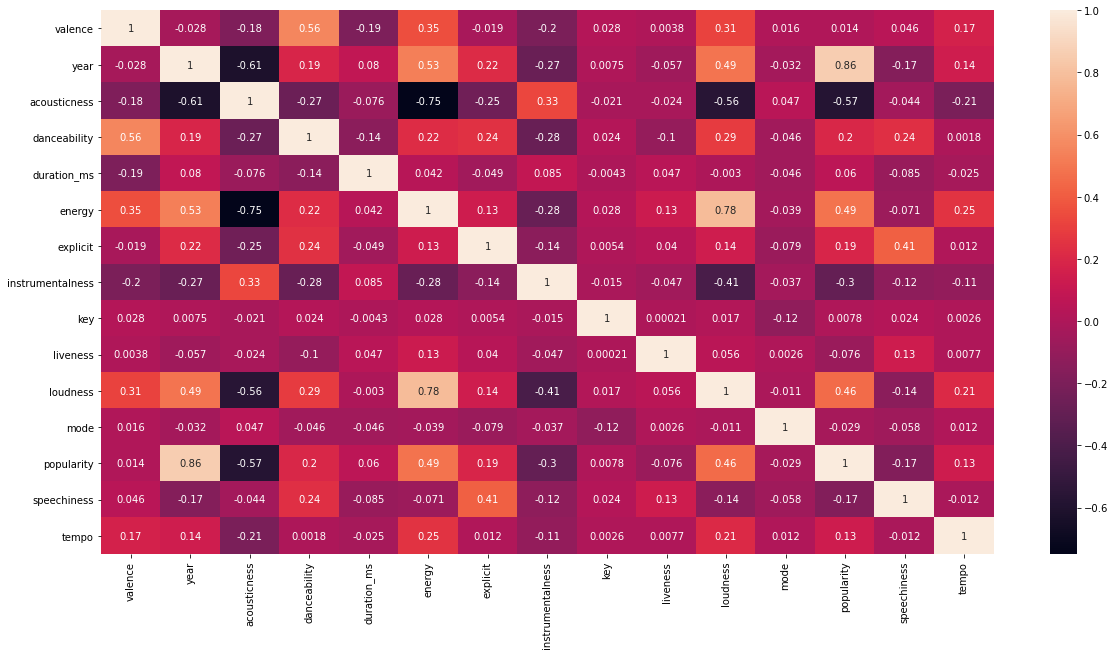

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

As can be seen there is a big positive correlation between year of release and popularity of the song (year feature therefore will be excluded from the data). Overall, it seems that such features as valence, acousticness, danceability, energy, loudness, speechiness and tempo can be very beneficial while fitting the data. Now let's look at the distributions of the mentioned features

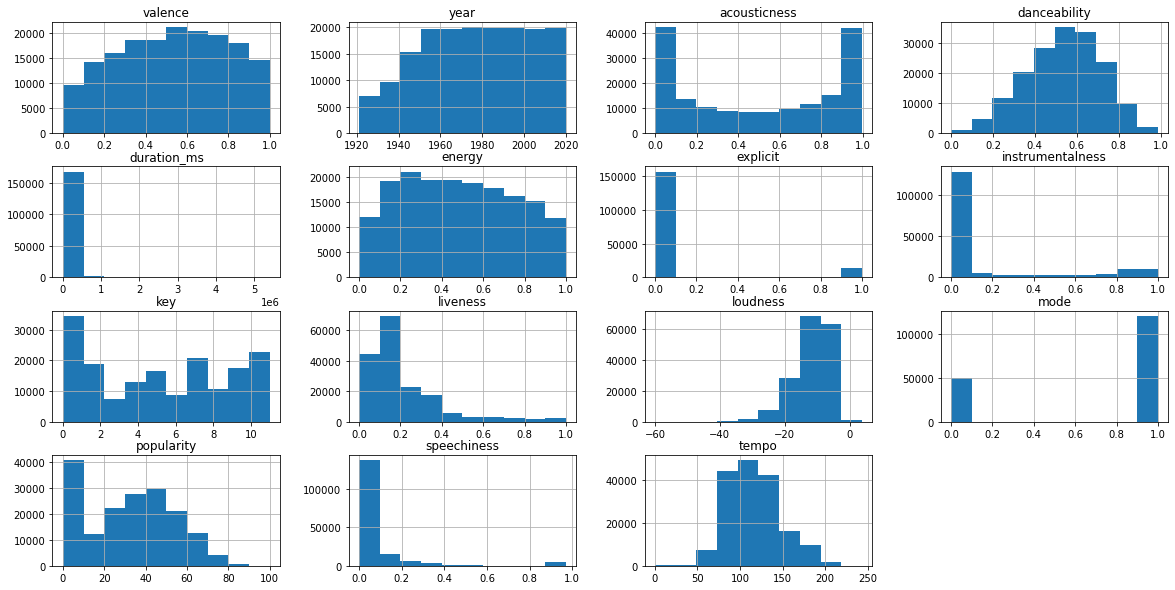

In [9]:
data.hist(figsize=(20, 10));

We have some binary features : mode, explicit

Now let's look at the most mentioned artists in the data. Here are artists with the most number of songs

In [176]:
s = pd.DataFrame(data['artists'].value_counts().head(10)).reset_index()
s.columns = ['Artists', 'Songs_sum']
s

,Artists,Songs_sum
0,['Эрнест Хемингуэй'],1211
1,['Эрих Мария Ремарк'],1068
2,['Francisco Canaro'],942
3,['Frank Sinatra'],630
4,['Ignacio Corsini'],628
5,['Elvis Presley'],504
6,['Johnny Cash'],484
7,['Bob Dylan'],474
8,['The Rolling Stones'],471
9,['The Beach Boys'],455


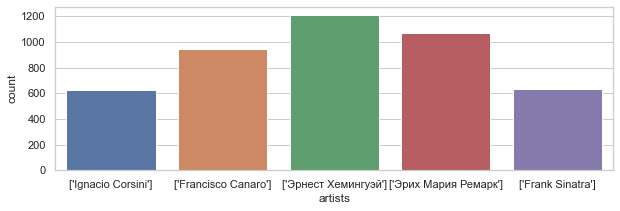

In [179]:
plt.figure(figsize=(10,3))
sns.countplot(x = data[data['artists'].\
                   isin(data['artists'].value_counts().head().index)]['artists']);

Plot some one-on-one distributions to see if there are some dependencies between parameters. Also one can mark binary features ('explicit' in this case) using diffrent olors to see additional dependencies. 

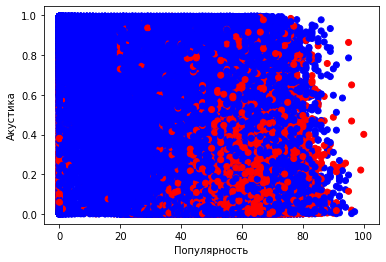

In [15]:
plt.scatter(data['popularity'], data['acousticness'], color = data['explicit'].map({False: 'blue', True: 'red'}));
plt.xlabel('Популярность');
plt.ylabel('Акустика');

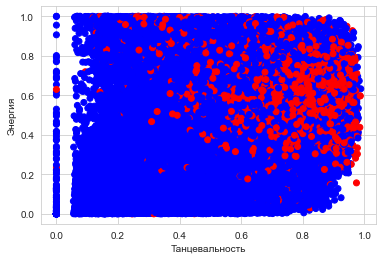

In [126]:
plt.scatter(data['danceability'], data['energy'], 
            color = data['explicit'].map({False: 'blue', True: 'red'})
            );
plt.xlabel('Танцевальность');
plt.ylabel('Энергия');

Acousticness does not depend much on popularity that much. 

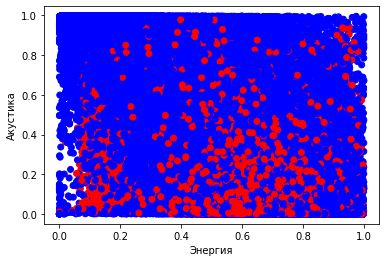

In [16]:
plt.scatter(data['energy'], data['acousticness'], color =data['explicit'].map({False: 'blue', True: 'red'}));
plt.xlabel('Энергия');
plt.ylabel('Акустика');

Although not obvious, it seems that there are not a lot of acoustic songs out there with explicit words 

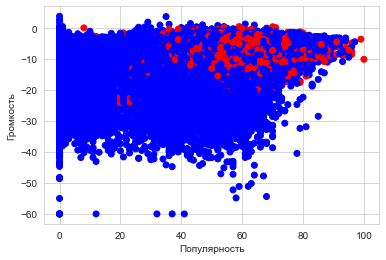

In [124]:
plt.scatter(data['popularity'], data['loudness'], 
            color = data['explicit'].map({False: 'blue', True: 'red'})
            );
plt.xlabel('Популярность');
plt.ylabel('Громкость');

Here we can see some outliers in loudness feature. Most of the songs stay in the [-40; 0]db. And there are a lot of popular songs with explicit content

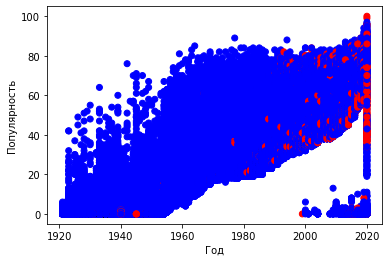

In [106]:
plt.scatter(data['year'], data['popularity'], 
            color = data['explicit'].map({0: 'blue', 1: 'red'})
            );
plt.xlabel('Год');
plt.ylabel('Популярность');

Here we can see almost linear dependence of popularity of the song on the year of making: newer songs are more popular than old ones. Also songs with explicit content started to appear only after 1980

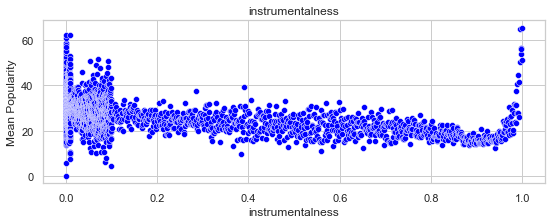

In [45]:
fig, ax = plt.subplots(1, figsize=(9, 3))
ax_data =  data.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='instrumentalness', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('instrumentalness')
ax.set_ylabel('Mean Popularity', fontsize=12);


It will be better to split this feature into 3 categories

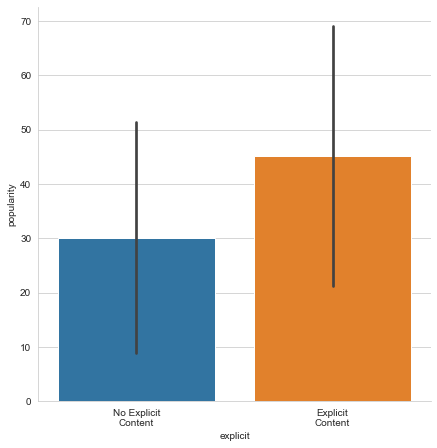

In [129]:
exp_data = sns.catplot(data=data, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd",
                        height=6)
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])

It seems that explicit content tend to be more popular among Spotify users

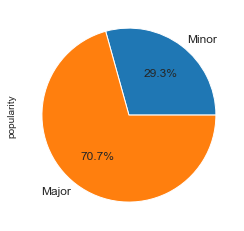

In [134]:
ax = data.groupby('mode')['popularity'].count().plot.pie(labels=['Minor', 'Major'],
                                 autopct='%1.1f%%', 
                                 fontsize=12)
a = ax.get_anchor


And this piechart shows that there are almost twice as many major songs than minor

<AxesSubplot:>

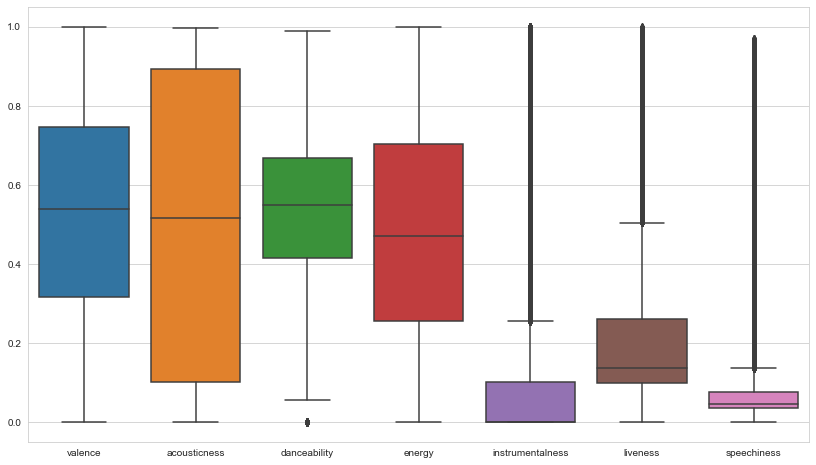

In [110]:
fig, ax = plt.subplots(1,1, figsize = (14,8))
sns.boxplot(
    data=data.drop(
                [
                    'year', 'duration_ms', 
                    'loudness', 'popularity', 
                    'tempo', 'key', 'mode', 'explicit'
                ],
                axis=1
            ),
    ax=ax,
)

Boxplots show that there are features suffer from outlies : instrumentalness, liveness, speechiness (their type of distributions can't be derived from the plots though). 

<AxesSubplot:>

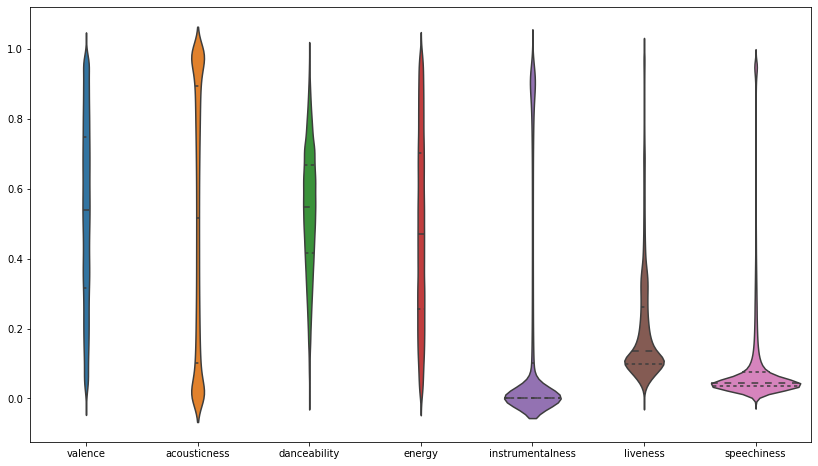

In [20]:
fig, ax = plt.subplots(1,1, figsize = (14,8))
sns.violinplot(
    data=data.drop(
                [
                    'year', 'duration_ms', 
                    'loudness', 'popularity', 
                    'tempo', 'key', 'mode', 'explicit'
                ],
                axis=1
            ),
    inner='quartile',
    ax=ax,
)

Here we can see that danceability distribution is close to normal, acousticness - has two distinct bumps on the borders of the distribution ( maybe this feature can be counted as binary). 

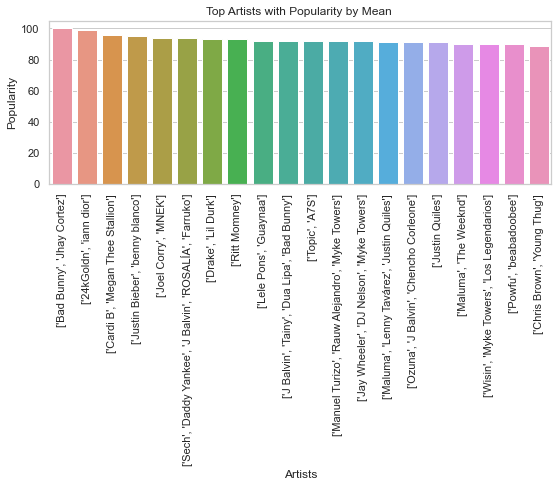

In [13]:
plt.figure(figsize=(9, 3));
sns.set(style="whitegrid");
x = data.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20);
ax = sns.barplot(x=x.index,y= x);
ax.set_title('Top Artists with Popularity by Mean ')
ax.set_ylabel('Popularity');
ax.set_xlabel('Artists');
plt.xticks(rotation = 90);

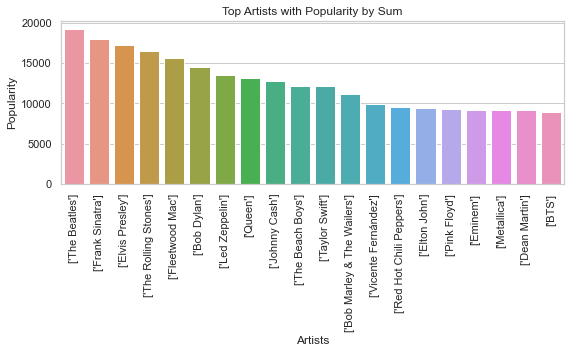

In [12]:
plt.figure(figsize=(9, 3));
sns.set(style="whitegrid");
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x = x.index, y = x);
ax.set_title('Top Artists with Popularity by Sum');
ax.set_ylabel('Popularity');
ax.set_xlabel('Artists');
plt.xticks(rotation = 90);

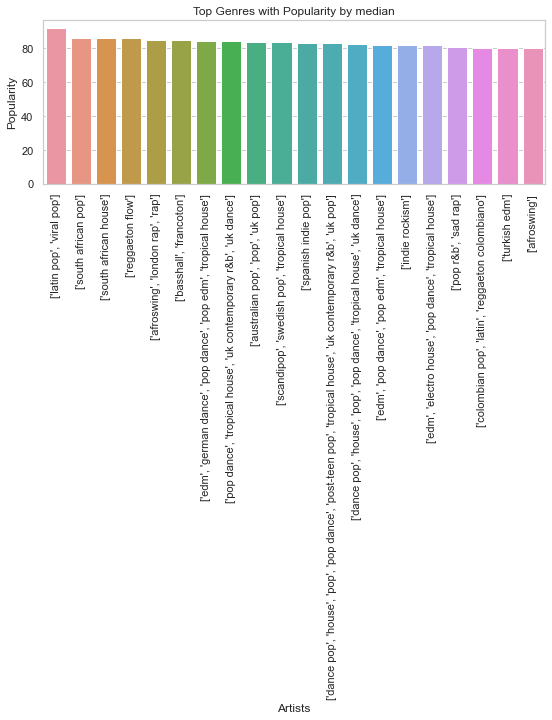

In [189]:
plt.figure(figsize=(9, 3));
sns.set(style="whitegrid");
x = data_genre.groupby("genres")["popularity"].median().sort_values(ascending=False).head(20)
ax = sns.barplot(x = x.index, y = x);
ax.set_title('Top Genres with Popularity by median');
ax.set_ylabel('Popularity');
ax.set_xlabel('Artists');
plt.xticks(rotation = 90);

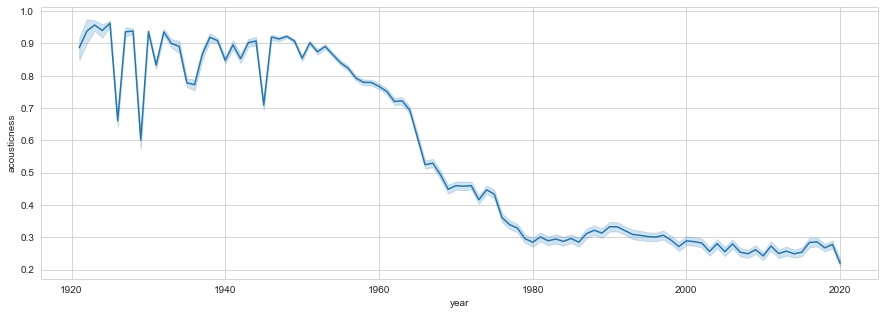

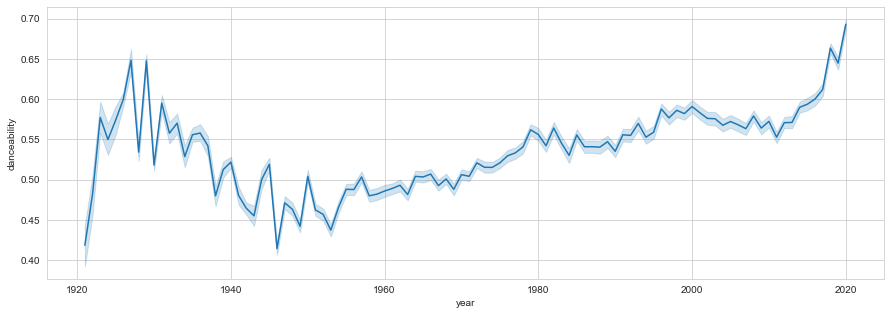

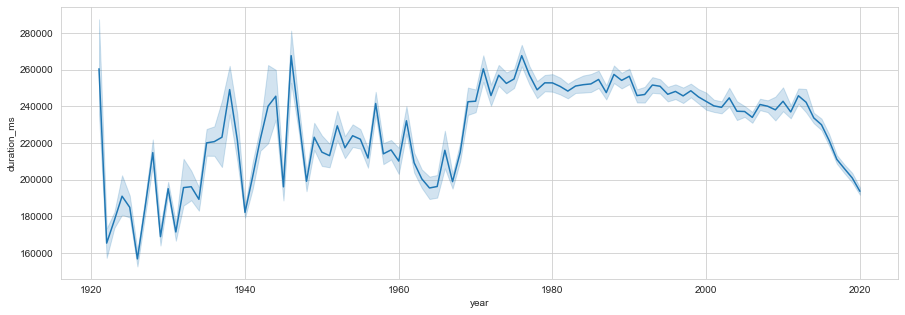

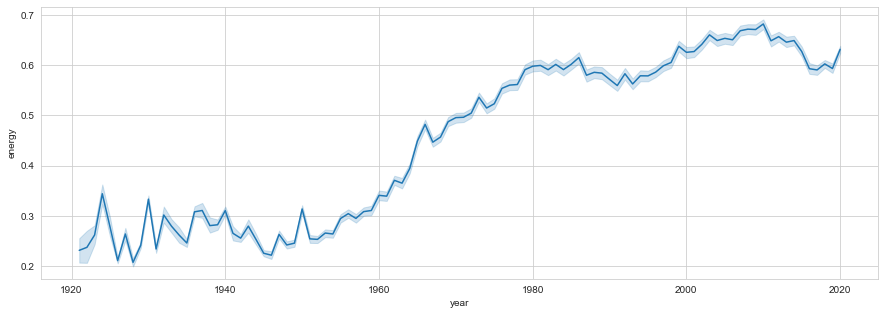

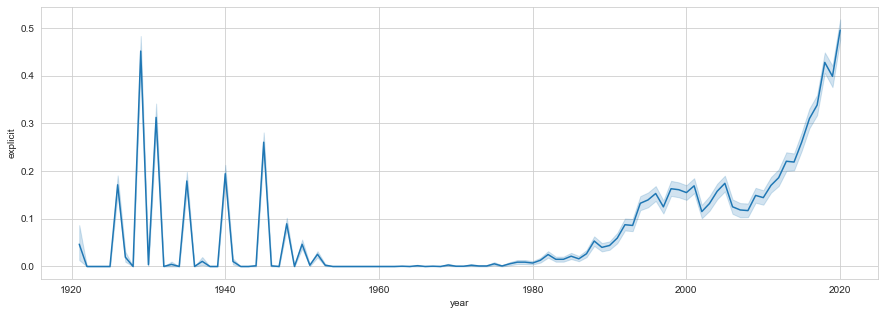

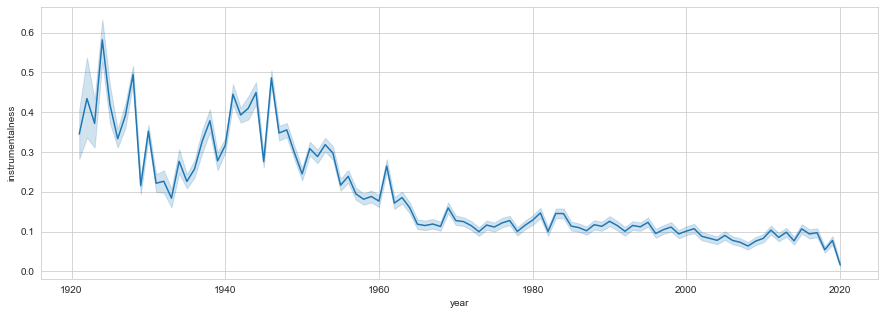

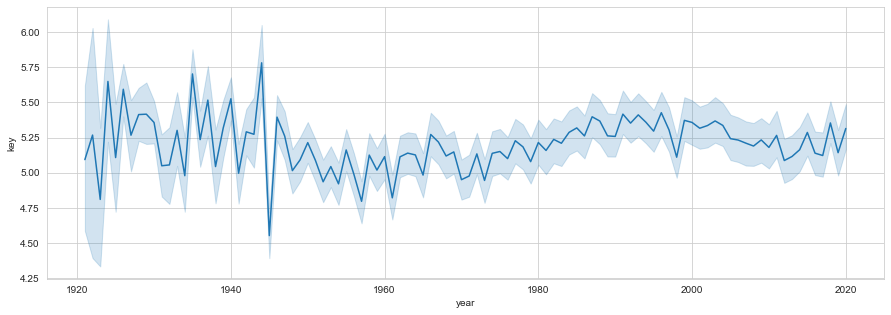

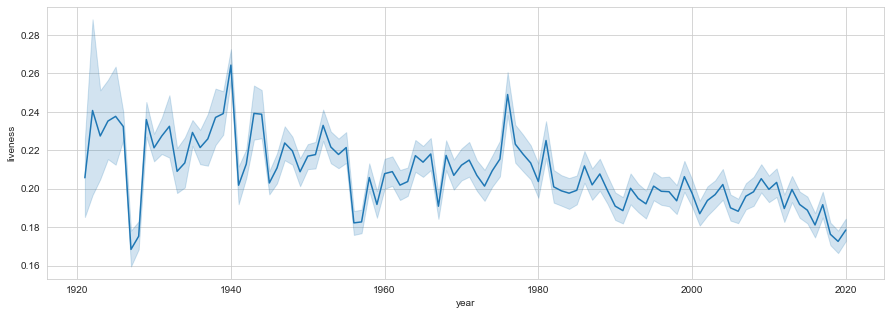

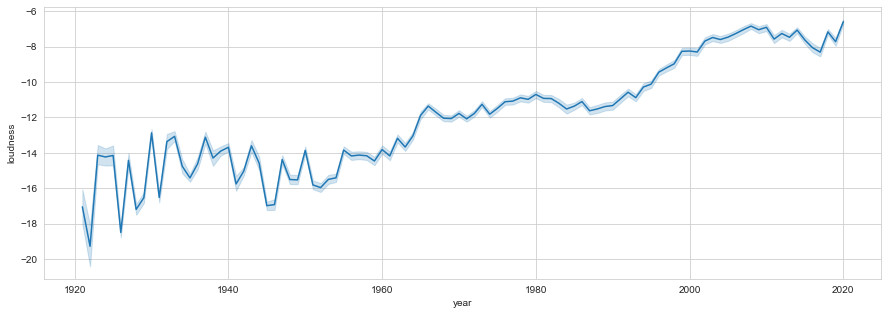

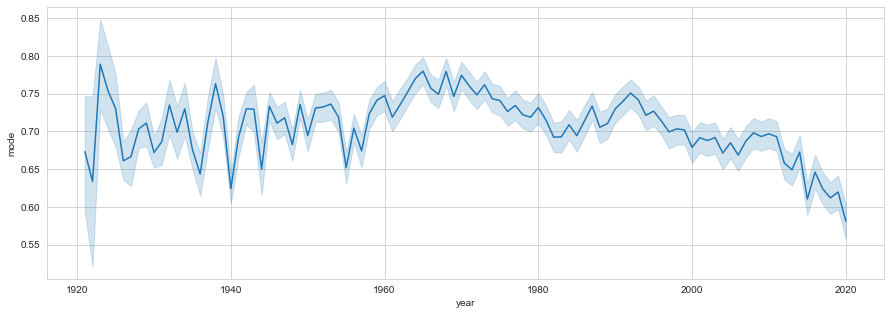

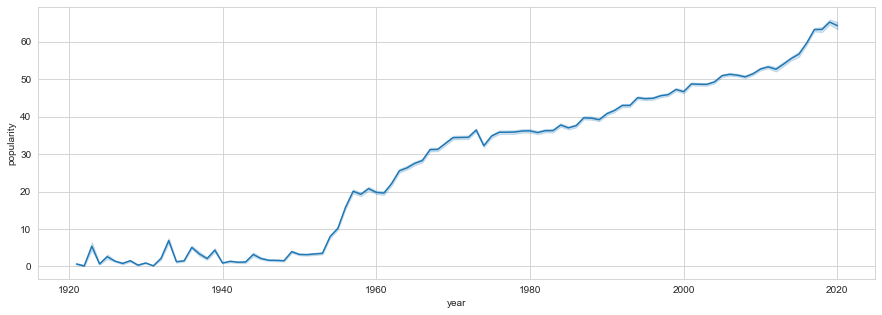

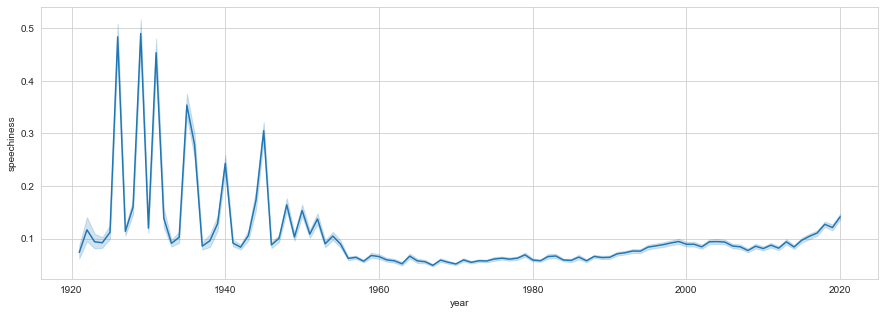

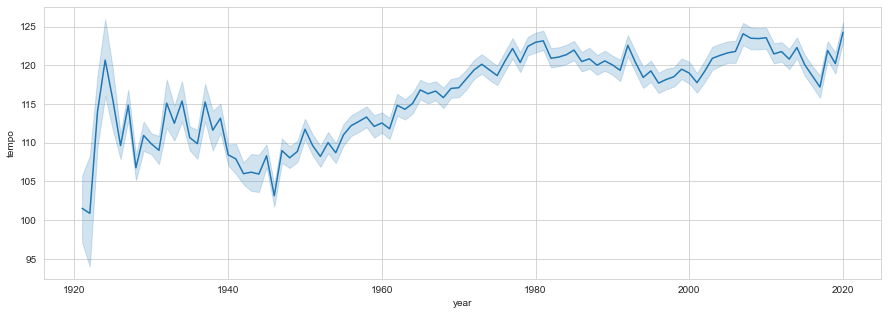

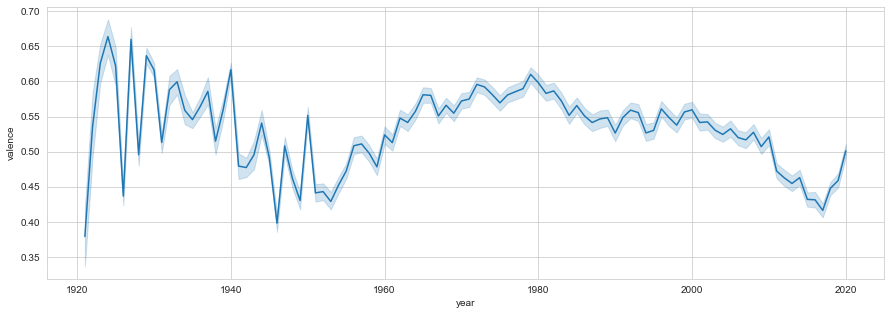

In [107]:
category1 = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']
for col in category1:
    y = data[col]
    x = y.index
    plt.figure(figsize=(15, 5))
    sns.set_style("whitegrid")
    sns.lineplot(x = 'year', y = y, data = data)

And lastly, dependence of all variable on the year . It seems that with years songs become more energetic, loud, danceable and explicit. Acousticness, though, decreases

# Pre-processing the data

First, we import a clean version of the data, without id, name, year and release_date and remove the duplicates. Artist feature will also not be included (the plan is to include this feature in the future )

In [146]:
# Remove duplicated
data = data[~data.duplicated()==1]

In [147]:
X = data.drop(['popularity', 'id', 'release_date', 'name', 'artists', 'year'], axis = 1)
y = data.popularity

Let's transform the Instrumentalness featue into 3 categories

In [148]:
X['instr_new']= X['instrumentalness'].map(lambda x: 1 if x<0.1 else (3 if x>0.95 else 2)) 
X['instrumentalness'].index= X['instr_new'].index
X = X.drop(['instrumentalness'], axis=1)

In [149]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import  LinearRegression
from sklearn.compose import ColumnTransformer
import sklearn.preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [150]:
#divide data into training and testing categiries
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, 
                                                          random_state=18);


In [151]:
##columns to scale
scale_col =[ 'duration_ms','loudness','tempo']
##columns to one-hot-encode (Key feature is categorical)
ohe_col = ['key','instr_new']
outliers_col = ['speechiness','liveness','danceability']

In [152]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_ohe = pd.DataFrame(encoder.fit_transform(X_train[ohe_col]))
X_holdout_ohe= pd.DataFrame(encoder.transform(X_holdout[ohe_col]))

X_train_ohe.index=X_train.index
X_holdout_ohe.index=X_holdout.index

num_X_train = X_train.drop(ohe_col, axis = 1)
num_X_holdout = X_holdout.drop(ohe_col, axis = 1)

X_train = pd.concat([num_X_train, X_train_ohe], axis = 1)
X_holdout= pd.concat([num_X_holdout, X_holdout_ohe], axis = 1)


In [153]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scale_minmax = MinMaxScaler();
X_train[scale_col] = scale_minmax.fit_transform(X_train[scale_col]);
X_holdout[scale_col]= scale_minmax.transform(X_holdout[scale_col]);

In [154]:
nl = '\n'
print(f'X_train shape is: {X_train.shape} {nl}y_train shape is: {y_train.shape} {nl}X_test shape is: {X_holdout.shape} {nl}y_test shape is: {y_holdout.shape}')

X_train shape is: (119457, 26) 
y_train shape is: (119457,) 
X_test shape is: (51196, 26) 
y_test shape is: (51196,)


In [155]:
X_train.describe().drop(['count','25%', '50%', '75%'])
X_holdout.describe().drop(['count','25%', '50%', '75%'])

,valence,acousticness,danceability,duration_ms,energy,explicit,liveness,loudness,mode,speechiness,...,5,6,7,8,9,10,11,12,13,14
mean,0.528425,0.504281,0.537053,0.052961,0.481580,0.084421,0.206391,0.772375,0.705465,0.098028,...,0.096902,0.051645,0.121826,0.063189,0.103035,0.071080,0.061274,0.746543,0.243691,0.009766
std,0.263842,0.376368,0.176558,0.030087,0.267522,0.278020,0.175735,0.090866,0.455838,0.161752,...,0.295827,0.221311,0.327088,0.243304,0.304008,0.256961,0.239835,0.434995,0.429313,0.098342
min,0.000000,0.000000,0.000000,0.000207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.995000,0.996000,0.986000,1.265765,1.000000,1.000000,1.000000,1.016816,1.000000,0.969000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

# Random Forest

In [156]:
rf = RandomForestRegressor(n_jobs=-1, random_state=17)

rf.fit(X_train, y_train)
preds = rf.predict(X_train)
preds2 = rf.predict(X_holdout)

In [157]:
print ('Holdout data - MSE:{:.2f}, MAE: {:.2f}'.format(np.sqrt(mse(y_holdout, preds2)),
                                                       mean_absolute_error(y_holdout, preds2 ),))   
print ('Training data - MSE:{:.2f}, MAE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, preds)),
                                                       mse(y_train, preds ),) )   

Holdout data - MSE:13.84, MAE: 10.46
Training data - MSE:5.29, MAE: 27.99


We will use KFold cross validation 

In [161]:
skf = KFold(n_splits=5, shuffle=True, random_state=13)
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
# report performance
print('Neg MSE : %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: -194.168 (1.800)


And tune some of the Random Forest parameters to try to reach greater performance. For the metrics we will use mean squared error

In [162]:
parameters = {'n_estimators': [100,150, 200], 'max_depth': [5,10,15]}
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='neg_mean_squared_error', cv=5, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.5min finished


In [163]:
rf_grid_search.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=200, n_jobs=-1,
                      random_state=17)

Looks like grid search for number of estimators and maximum depth of the trees reached limit. Presumably one could continue grid search study with better computational power to improve model performance   

In [170]:
scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)

print('Neg MSE : %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Neg MSE : -194.273 (1.636)


In [165]:
pd.DataFrame({'feat':X_train.columns,
              'coef':rf_grid_search.best_estimator_.feature_importances_}).sort_values(by = 'coef',ascending=False )

,feat,coef
1,acousticness,0.482381
9,speechiness,0.124900
7,loudness,0.105083
3,duration_ms,0.058020
0,valence,0.048643
2,danceability,0.039265
4,energy,0.033596
6,liveness,0.030649
5,explicit,0.025900
10,tempo,0.024446


Here we can see that the most important feature turned out to be Acousticness

# Linear Regression

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression ()

lr.fit(X_train, y_train)
preds_lr = lr.predict(X_train)
preds2_lr = lr.predict(X_holdout)

In [168]:
print ('Holdout data - MSE:{:.2f}, MAE: {:.2f}'.format(np.sqrt(mean_squared_error(y_holdout, preds2_lr)),
                                                       mean_absolute_error(y_holdout, preds2_lr ), ))   
print ('Training data - MSE:{:.2f}, MAE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, preds_lr)),
                                                       mean_absolute_error(y_train, preds_lr ),))   

Holdout data - MSE:16.10, MAE: 12.97
Training data - MSE:16.13, MAE: 12.97


In [169]:
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# report performance
print('Neg MSE : %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Neg MSE : -260.169 (1.132)


Usage of Linear Regression did not bring any advantage other than the computational speed of the model itself

For the continuation of the study:

1. Include Artists feature, as well as the Genre feature 
2. Try to use xgboost models to improve performance